In [80]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
import seaborn as sns

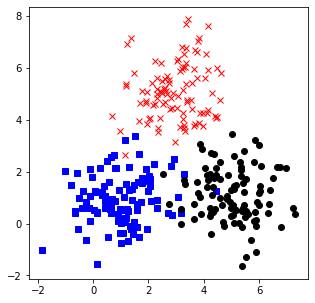

In [81]:
nPerClust = 100
blur = 1

A = [  1, 1 ]
B = [  5, 1 ]
C = [  3, 5 ]

a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]
c = [ C[0]+np.random.randn(nPerClust)*blur , C[1]+np.random.randn(nPerClust)*blur ]

labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1)),np.ones((nPerClust,1))*2))

data_np = np.hstack((a,b,c)).T

data = torch.tensor(data_np).float()
labels = torch.squeeze(torch.tensor(labels_np).long())

fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.plot(data[np.where(labels==2)[0],0],data[np.where(labels==2)[0],1],'rx')
plt.show()

In [82]:
model = nn.Sequential(
    nn.Linear(2,3),
    nn.ReLU(),
    nn.Linear(3,3),
    nn.ReLU(),
    nn.Linear(3,3),
    nn.Softmax(dim=1)
)

lossfun = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr=.01)

In [83]:
epochs = 10000
losses = torch.zeros(epochs)
accuracies_per_epochi = []

for epochi in range(epochs):

    # forward
    y_hat = model(data)

    # compute losses 
    loss = lossfun(y_hat, labels)
    losses[epochi] = loss

    # backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    matches = torch.argmax(y_hat, axis=1) == labels
    matchesNUM = matches.float()
    accuracy = 100*torch.mean(matchesNUM)
    accuracies_per_epochi.append( accuracy ) 

predictions_2 = torch.argmax(y_hat,axis=1)

totalacc = 100*torch.mean((predictions_2 == labels).float())  
    

In [84]:
totalacc

tensor(97.)

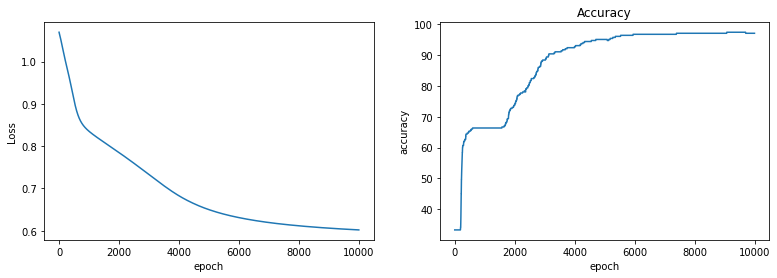

In [85]:
fig, ax = plt.subplots(1,2,figsize=(13,4))
ax[0].plot(losses.detach())
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('epoch')

ax[1].plot(accuracies_per_epochi)
ax[1].set_ylabel('accuracy')
ax[1].set_xlabel('epoch')
ax[1].set_title('Accuracy')
plt.show()

In [86]:
acc_0 = sum(labels[predictions_2 == 0] == 0)/len(labels[predictions_2 == 0])
acc_1 = sum(labels[predictions_2 == 1] == 1)/len(labels[predictions_2 == 1])
acc_2 = sum(labels[predictions_2 == 2] == 2)/len(labels[predictions_2 == 2])

In [87]:
print(f'Total accuracy: {totalacc}')
print(f'Accuracy for 0: {acc_0}')
print(f'Accuracy for 1: {acc_1}')
print(f'Accuracy for 2: {acc_2}')

Total accuracy: 97.0
Accuracy for 0: 0.969072163105011
Accuracy for 1: 0.9607843160629272
Accuracy for 2: 0.9801980257034302


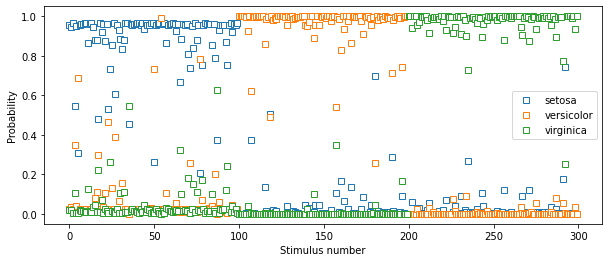

In [88]:
sm = nn.Softmax(1)

fig = plt.figure(figsize=(10,4))

plt.plot(y_hat.detach(),'s',markerfacecolor='w')
# plt.plot(sm(y_hat.detach()),'s',markerfacecolor='w')
plt.xlabel('Stimulus number')
plt.ylabel('Probability')
plt.legend(['setosa','versicolor','virginica'])
plt.show()